## Observations and Insights 

In [109]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
complete_data = pd.merge(mouse_metadata, study_results, how ='left', on=['Mouse ID', 'Mouse ID'])
complete_data
# Display the data table for preview


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [110]:
# Checking the number of mice.
mousecount = complete_data['Mouse ID'].value_counts()
mousecount

g989    13
y865    10
r604    10
w914    10
a411    10
        ..
b447     1
t573     1
n482     1
x336     1
x226     1
Name: Mouse ID, Length: 249, dtype: int64

In [111]:
# Dropped data with duplicate mouse ID and timepoint 
#cleandata = complete_data.drop_duplicates(subset = ['Mouse ID', "Timepoint"], keep='first')
#cleandata = cleandata.dropna(how='any')
#cleandata
cleandata = complete_data.loc[complete_data["Mouse ID"]!= "g989"]
cleandata


,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [112]:
# Count number of mice in cleaned data set
mousecounts = cleandata['Mouse ID'].value_counts()
mousecounts

y865    10
k403    10
w914    10
a411    10
b559    10
        ..
n482     1
x226     1
t573     1
o848     1
b447     1
Name: Mouse ID, Length: 248, dtype: int64

## Summary Statistics

In [113]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

#create empty lists to hold stats for each drug
tv_means=[]
tv_medians = []
tv_sd = []
tv_var = []
tv_sem = []

#stats for ramicane
ramicane_tv = cleandata[cleandata["Drug Regimen"] == 'Ramicane']
tv_means.append(ramicane_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(ramicane_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(ramicane_tv['Tumor Volume (mm3)']))
tv_var.append(ramicane_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(ramicane_tv.sem()['Tumor Volume (mm3)'])
#stats for capomulin
capomulin_tv = cleandata[cleandata["Drug Regimen"]=="Capomulin"]
tv_means.append(capomulin_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(capomulin_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(capomulin_tv['Tumor Volume (mm3)']))
tv_var.append(capomulin_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(capomulin_tv.sem()['Tumor Volume (mm3)'])
#stats for infubinol
infubinol_tv = cleandata[cleandata['Drug Regimen']=='Infubinol']
tv_means.append(infubinol_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(infubinol_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(infubinol_tv['Tumor Volume (mm3)']))
tv_var.append(infubinol_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(infubinol_tv.sem()['Tumor Volume (mm3)'])
#stats for placebo
placebo_tv = cleandata[cleandata["Drug Regimen"]=='Placebo']
tv_means.append(placebo_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(placebo_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(placebo_tv['Tumor Volume (mm3)']))
tv_var.append(placebo_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(placebo_tv.sem()['Tumor Volume (mm3)'])
#stats for ceftamin
ceftamin_tv = cleandata[cleandata["Drug Regimen"]=='Ceftamin']
tv_means.append(ceftamin_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(ceftamin_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(ceftamin_tv['Tumor Volume (mm3)']))
tv_var.append(ceftamin_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(ceftamin_tv.sem()['Tumor Volume (mm3)'])
#stats for stelasyn
stelasyn_tv = cleandata[cleandata["Drug Regimen"]=='Stelasyn']
tv_means.append(stelasyn_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(stelasyn_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(stelasyn_tv['Tumor Volume (mm3)']))
tv_var.append(stelasyn_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(stelasyn_tv.sem()['Tumor Volume (mm3)'])
#stats for zoniferol
zoniferol_tv = cleandata[cleandata["Drug Regimen"]=='Zoniferol']
tv_means.append(zoniferol_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(zoniferol_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(zoniferol_tv['Tumor Volume (mm3)']))
tv_var.append(zoniferol_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(zoniferol_tv.sem()['Tumor Volume (mm3)'])
#stats for ketapril
ketapril_tv = cleandata[cleandata["Drug Regimen"]=='Ketapril']
tv_means.append(ketapril_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(ketapril_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(ketapril_tv['Tumor Volume (mm3)']))
tv_var.append(ketapril_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(ketapril_tv.sem()['Tumor Volume (mm3)'])
#stats for naftisol
naftisol_tv = cleandata[cleandata["Drug Regimen"]=='Naftisol']
tv_means.append(naftisol_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(naftisol_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(naftisol_tv['Tumor Volume (mm3)']))
tv_var.append(naftisol_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(naftisol_tv.sem()['Tumor Volume (mm3)'])
#stats for propiva
propriva_tv = cleandata[cleandata["Drug Regimen"]=='Propriva']
tv_means.append(propriva_tv['Tumor Volume (mm3)'].mean())
tv_medians.append(propriva_tv['Tumor Volume (mm3)'].median())
tv_sd.append(st.tstd(propriva_tv['Tumor Volume (mm3)']))
tv_var.append(propriva_tv.var()['Tumor Volume (mm3)'])
tv_sem.append(propriva_tv.sem()['Tumor Volume (mm3)'])

zippedList =  list(zip(tv_means, tv_medians, tv_sd, tv_var, tv_sem))
tv_stats_sum = pd.DataFrame(zippedList, columns = ['Tumor Vol Mean' , 'Tumor Vol Median', 'Tumor Vol St. Dev', 'Tumor Vol Var', 'Tumor Vol SEM'], index=['Ramicane', 'Capomulin', 'Infubinol', 'Placebo', 'Ceftamin', 'Stelasyn', 'Zoniferol', 'Ketapril', 'Naftisol', 'Propriva'])
tv_stats_sum

,Tumor Vol Mean,Tumor Vol Median,Tumor Vol St. Dev,Tumor Vol Var,Tumor Vol SEM
Ramicane,40.216745,40.673236,4.846308,23.486704,0.320955
Capomulin,40.675741,41.557809,4.994774,24.947764,0.329346
Infubinol,52.884795,51.820584,6.567243,43.128684,0.492236
Placebo,54.033581,52.288934,7.821003,61.168083,0.581331
Ceftamin,52.591172,51.776157,6.268188,39.290177,0.469821
Stelasyn,54.233149,52.431737,7.710419,59.450562,0.573111
Zoniferol,53.236507,51.818479,6.966589,48.533355,0.516398
Ketapril,55.235638,53.698743,8.279709,68.553577,0.603860
Naftisol,54.331565,52.509285,8.134708,66.173479,0.596466
Propriva,52.320930,50.446266,6.622085,43.852013,0.544332


## Bar and Pie Charts

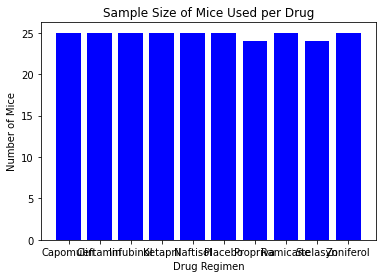

In [114]:
#create df of just drug regimen and mouse ID 
mouse_count = cleandata[['Drug Regimen', 'Mouse ID']]
#groupby drug and count number of unique mouse ID's for each
mouse_counts = mouse_count.groupby(['Drug Regimen']).nunique()
#create variables to plug into bar chart
number_of_mice = mouse_counts['Mouse ID']
drugs = ['Capomulin', 'Ceftamin', 'Infubinol', 'Ketapril', 'Naftisol', 'Placebo', 'Propriva', 'Ramicane', 'Stelasyn', 'Zoniferol']
#plot in bar graph
x_axis = np.arange(len(number_of_mice))
plt.bar(x_axis, number_of_mice, color="b", align="center")
#format
tick_locations = [value for value in x_axis]
plt.xticks(tick_locations, drugs)
#label
plt.title("Sample Size of Mice Used per Drug")
plt.xlabel("Drug Regimen")
plt.ylabel("Number of Mice")
plt.savefig("../Images/MouseBar.png")
plt.show()


In [115]:
#enter dataframe plot

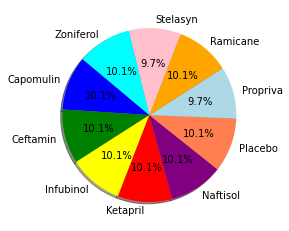

In [116]:
colors = ['blue', 'green', 'yellow', 'red', 'purple', 'coral', 'lightblue', 'orange', 'pink', 'cyan']
plt.pie(number_of_mice, labels=drugs, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)
plt.savefig("../Images/MousePie.png")
plt.show()




In [117]:
#enter dataframe plot

## Quartiles, Outliers and Boxplots

In [118]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens: 

# Capomulin, Ramicane, Infubinol, and Ceftamin

# extract columns of importance from clean df into new df
finalTV = cleandata[['Drug Regimen', 'Mouse ID', 'Timepoint', 'Tumor Volume (mm3)']]
#drop duplicate mice IDs, keep only last timepoint
finalTV_df = finalTV.drop_duplicates(subset = ['Mouse ID'], keep='last')
#select only the drugs we want to find tumor data on
options = ['Capomulin', 'Ramicane', 'Infubinol', 'Ceftamin']
finalTV_cleaned = finalTV_df[finalTV_df['Drug Regimen'].isin(options)] 
finalTV_cleaned.set_index('Drug Regimen', inplace=True)
finalTV_cleaned.reset_index(level=0, inplace=True)
finalTV_cleaned

,Drug Regimen,Mouse ID,Timepoint,Tumor Volume (mm3)
0,Ramicane,k403,45,22.050126
1,Capomulin,s185,45,23.343598
2,Capomulin,x401,45,28.484033
3,Capomulin,m601,45,28.430964
4,Ramicane,g791,45,29.128472
...,...,...,...,...
95,Ceftamin,x822,45,61.386660
96,Infubinol,y163,45,67.685569
97,Ceftamin,y769,45,68.594745
98,Ceftamin,y865,45,64.729837


In [119]:
#list of treatments for loop and plot labels
treatments = ['Ramicane', 'Capomulin', 'Ceftamin', 'Infubinol']
#empty lists to fill
final_tv = []
#loop to fill lists with final tumor volume for each mouse on the four drugs of interest
for treatment in treatments:
    drug = finalTV_cleaned[finalTV_cleaned["Drug Regimen"] == treatment]
    final_tv.append(drug["Tumor Volume (mm3)"])


In [120]:
# Calculate the IQR and quantitatively determine if there are any potential outliers.
tumorvolume = finalTV_cleaned['Tumor Volume (mm3)']
quartiles = tumorvolume.quantile([.25,.5,.75])
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
print(f"The interquartile range of tumor volume is: {iqr}")
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(f"Outliers may be values below {lower_bound} or above {upper_bound}.")


The interquartile range of tumor volume is: 22.74251795250001
Outliers may be values below 3.0739668737499812 or above 94.04403868375002.


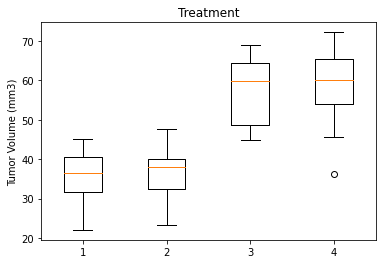

In [121]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
fig1, ax1 = plt.subplots()
ax1.set_title('Final Tumor Volumes')
ax1.set_title('Treatment')
ax1.set_ylabel('Tumor Volume (mm3)')
plt.savefig("../Images/MouseBox.png")
ax1.boxplot(final_tv)
plt.show()

## Line and Scatter Plots

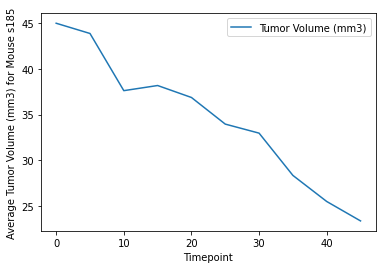

In [122]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin
capomulinmouse_df = cleandata[cleandata["Mouse ID"] == 's185']
capomulinmouse_df

capomulinmouse_df.plot(kind='line',x='Timepoint',y='Tumor Volume (mm3)')
plt.xlabel('Timepoint')
plt.ylabel('Average Tumor Volume (mm3) for Mouse s185')
plt.savefig("../Images/MouseLinePlot.png")
plt.show()


In [123]:
#grouped df to create scatter plot for Capomulin group
capomulin_df = cleandata[cleandata["Drug Regimen"] == 'Capomulin']
capomulindf = capomulin_df[["Mouse ID", "Weight (g)", "Tumor Volume (mm3)"]]
capomulin_average = capomulindf.groupby(["Mouse ID"]).mean()                     

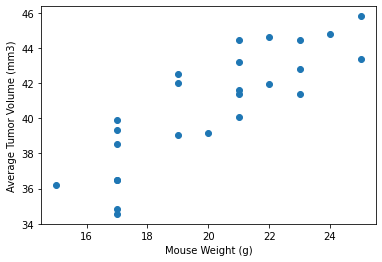

In [124]:
#scatter plot of mouse weight vs average tumor volume
x_values = capomulin_average['Weight (g)']
y_values = capomulin_average['Tumor Volume (mm3)']
plt.scatter(x_values,y_values)
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.savefig("../Images/MouseBox.png")
plt.show()

## Correlation and Regression

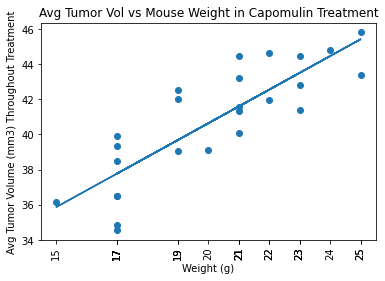

The correlation between both factors is 0.84


In [125]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen
mouseweight = capomulin_average['Weight (g)']
avgtv = capomulin_average['Tumor Volume (mm3)']


tvw_slope, tvw_int, tvw_r, tvw_p, tvw_std_err = st.linregress(mouseweight, avgtv)
tvw_fit = tvw_slope * mouseweight + tvw_int
plt.scatter(mouseweight,avgtv)
plt.plot(mouseweight,tvw_fit)
plt.xticks(mouseweight, rotation=90)
plt.xlabel('Weight (g)')
plt.ylabel('Avg Tumor Volume (mm3) Throughout Treatment')
plt.title("Avg Tumor Vol vs Mouse Weight in Capomulin Treatment")
plt.show()

correlation = st.pearsonr(mouseweight, avgtv)

print(f"The correlation between both factors is {round(correlation[0],2)}")


